<a href="https://colab.research.google.com/github/ArielFerreiro/ar-stamp-checker/blob/main/attempt.01/02_StampsCrop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crop the stamp from the original image ans store them in a pickle file. Resize to 299x299 px

In [1]:
%load_ext autoreload
%autoreload 2

### Notebook Imports

In [2]:
import pandas as pd
import numpy as np
import pickle
import cv2
from os import path

### Load the drive to grab the images and labels

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Notebook Functions

In [4]:
def cropImage(path_in, item):
    """
    Opens an image from the original dataset, crops it using the labels, 
    resize the picture and returns it as a numpy array
    """
    dim = (299, 299)
    image_in = path_in+item.label+"/"+item.file_name
    
    if path.exists(image_in):  
        # open image
        img = cv2.imread(image_in, flags=cv2.IMREAD_COLOR)

        # crop image
        crop_img = img[item.y:item.y+item.deltay, item.x:item.x+item.deltax]

        # resize image
        resized = cv2.resize(crop_img, dim, interpolation = cv2.INTER_AREA)
        
        return resized
    else:
        return None

### Global Params


In [5]:
images_path = 'drive/My Drive/Colab Notebooks/stamps/original/'
results_path = 'drive/My Drive/Colab Notebooks/stamps/results/'

### Start

In [6]:
with open(results_path+"labels.pkl","rb") as f:
    (df, classes_idx, cant_classes, classes) = pickle.load(f)

In [7]:
stamps = []
for index, row in df.iterrows():
    stamp = cropImage(images_path, row)
    if not stamp is None:
      stamps.append(stamp)

In [8]:
len(stamps)

1888

In [9]:
stamps_array = np.array(stamps)
stamps_array.shape

(1888, 299, 299, 3)

# Checkpoint

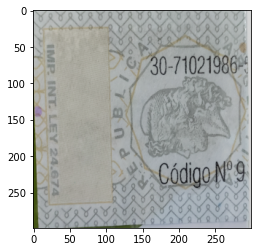

In [10]:
from matplotlib import pyplot as plt
plt.imshow(stamps_array[0])

In [11]:
with open(results_path + "stamps_299.pkl","wb") as f:
    pickle.dump((stamps_array), f)

In [12]:
#### DONE v1 28/10/2020
#### Auth: Ariel Ferreiro Diaz